# Data exploration and preprocessing:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

data = pd.read_csv('/content/drive/MyDrive/Dataset/Supply_Chain_Dataset_New.csv', encoding='latin1', engine='python')

#drop unwanted columns
unwanted_columns =["Category Id","Customer Email","Customer Zipcode","Customer Street","Customer Fname","Customer Id","Customer Lname","Customer Segment","Latitude","Longitude","Order Customer Id","order date (DateOrders)","Order Id","Order Item Cardprod Id","Order Item Id","Order Zipcode","Product Card Id","Product Category Id","Product Status","shipping date (DateOrders)"]
data.drop(unwanted_columns, axis=1, inplace=True)

data.info()



Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  object 
 8   Customer City                  180519 non-null  object 
 9   Customer Country               180519 non-null  object 
 10  Customer State                 180519 non-null  object 
 11  Market                         180519 non-null  object 
 12  Orde

In [ ]:
# change object data into int or float

hist_data = data.copy(deep=False)

from sklearn.preprocessing import LabelEncoder
def Change_obj_type(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])
    return data
new_data = Change_obj_type(hist_data)
new_data

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Name,Product Price,Shipping Mode
0,2,5,4,-44.630001,284.250000,1,1,0,66,1,...,1,293.040008,284.250000,-44.630001,7,174,6,79,293.040008,3
1,2,2,4,87.180000,249.080002,0,0,0,66,1,...,1,293.040008,249.080002,87.180000,13,283,6,79,293.040008,3
2,1,3,2,105.489998,293.040008,1,1,0,66,1,...,1,293.040008,293.040008,105.489998,7,440,2,79,293.040008,2
3,1,2,2,25.270000,287.179993,3,0,0,66,1,...,1,293.040008,287.179993,25.270000,7,1002,2,79,293.040008,2
4,1,4,2,21.400000,243.220001,1,1,0,66,1,...,1,293.040008,243.220001,21.400000,15,114,2,79,293.040008,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,1,2,1,79.480003,218.949997,1,1,48,66,1,...,1,260.649994,218.949997,79.480003,15,478,3,107,260.649994,0
180515,1,2,1,16.030001,213.729996,1,1,48,66,1,...,1,260.649994,213.729996,16.030001,7,354,3,107,260.649994,0
180516,2,5,2,-28.860001,255.440002,1,1,48,66,1,...,1,260.649994,255.440002,-28.860001,15,932,4,107,260.649994,2
180517,2,5,2,-31.650000,229.369995,1,1,48,66,1,...,1,260.649994,229.369995,-31.650000,11,90,6,107,260.649994,2


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  int64  
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Name                  180519 non-null  int64  
 8   Customer City                  180519 non-null  int64  
 9   Customer Country               180519 non-null  int64  
 10  Customer State                 180519 non-null  int64  
 11  Market                         180519 non-null  int64  
 12  Order City                    

1)Simple linear reg

y:Order Item Total,y:sales

In [ ]:
y = new_data[['Order Item Total']]
X = new_data['Sales']

# Split the data into training, validation, and test sets
X_train, X_oit, y_train, y_oit = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_oit, y_oit, test_size=0.5, random_state=42)


Mean Squared Error on Validation Set: 287.97514803776716
Mean Squared Error on Test Set: 296.66511347079023


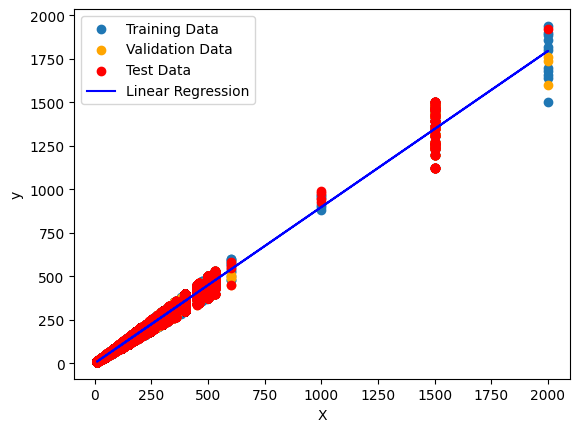

In [ ]:
import numpy as np

# Train the linear regression model on the training set
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the validation set
y_val_pred = model.predict(X_val.values.reshape(-1, 1))

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse_val}')

# Make predictions on the test set
y_test_pred = model.predict(X_test.values.reshape(-1, 1))

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on Test Set: {mse_test}')

# Plot the training data, validation data, test data, and regression lines
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_val, y_val, label='Validation Data', color='orange')
plt.scatter(X_test, y_test, label='Test Data', color='r')
plt.plot(X_test, y_test_pred, label='Linear Regression', color='b')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
r2_test = r2_score(y_test, y_test_pred)
print(f'R-squared on Test Set: {r2_test}')

R-squared on Test Set: 0.9787875810255866


R^2->1.therefore this model is suitable for bi db.